<a href="https://colab.research.google.com/github/stevengregori92/Ratings-and-Gross-in-Movies/blob/main/Imdb_Top.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [1]:
import pandas as pd
import seaborn as sns

#Import Data

In [2]:
data = pd.read_csv('imdb_top_1000.csv')
data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


#Explore Data

In [3]:
len(data), len(data.dropna())

(1000, 714)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


#Clean Data

In [5]:
data = data.dropna()

In [6]:
len(data)

714

In [7]:
data['Gross'] = data['Gross'].str.replace(',', '')

In [8]:
data['Gross'] = data['Gross'].astype(int)

In [10]:
data['Runtime'] = data['Runtime'].str.replace(' min','')

In [11]:
data['Runtime'] = data['Runtime'].astype(int)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 997
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    714 non-null    object 
 1   Series_Title   714 non-null    object 
 2   Released_Year  714 non-null    object 
 3   Certificate    714 non-null    object 
 4   Runtime        714 non-null    int64  
 5   Genre          714 non-null    object 
 6   IMDB_Rating    714 non-null    float64
 7   Overview       714 non-null    object 
 8   Meta_score     714 non-null    float64
 9   Director       714 non-null    object 
 10  Star1          714 non-null    object 
 11  Star2          714 non-null    object 
 12  Star3          714 non-null    object 
 13  Star4          714 non-null    object 
 14  No_of_Votes    714 non-null    int64  
 15  Gross          714 non-null    int64  
dtypes: float64(2), int64(3), object(11)
memory usage: 94.8+ KB


In [13]:
data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


In [15]:
data.groupby('Genre').mean().sort_values('IMDB_Rating', ascending = False)

,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
Genre,,,,,
"Crime, Mystery, Thriller",106.000000,8.50,77.000000,9.912080e+05,2.334157e+07
"Action, Sci-Fi",126.666667,8.40,77.333333,1.157242e+06,1.382411e+08
"Horror, Sci-Fi",117.000000,8.40,89.000000,7.878060e+05,7.890000e+07
"Drama, Horror",146.000000,8.40,66.000000,8.982370e+05,4.401737e+07
"Drama, Mystery, War",139.000000,8.35,87.000000,3.782105e+05,4.516430e+07
...,...,...,...,...,...
"Comedy, Music, Musical",87.000000,7.60,96.000000,4.035100e+04,1.378002e+07
"Action, Biography, Crime",112.000000,7.60,76.000000,1.217310e+05,4.300000e+07
"Drama, Horror, Sci-Fi",113.000000,7.60,73.000000,3.768530e+05,4.506492e+07


In [16]:
data = data.copy()
data['Genre'] = data['Genre'].str.split(',')
data = data.explode('Genre')
data['Genre'] = data['Genre'].str.strip()
data.groupby('Genre').mean().sort_values('Gross', ascending = False)

,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
Genre,,,,,
Adventure,126.104294,7.963190,77.883436,497113.453988,1.718926e+08
Sci-Fi,122.392857,7.991071,74.928571,649350.142857,1.611225e+08
Action,126.271429,7.937143,73.792857,522284.042857,1.566213e+08
Animation,99.793651,7.926984,81.841270,322721.063492,1.359713e+08
Fantasy,116.745455,7.901818,76.000000,396147.254545,1.105749e+08
Family,115.279070,7.876744,77.232558,259655.372093,1.034671e+08
Comedy,108.198758,7.873292,77.434783,297764.378882,7.521764e+07
Thriller,120.939394,7.915152,76.010101,393537.919192,6.494065e+07
History,146.763158,7.910526,77.947368,260518.236842,6.218803e+07


<AxesSubplot:xlabel='IMDB_Rating', ylabel='Runtime'>

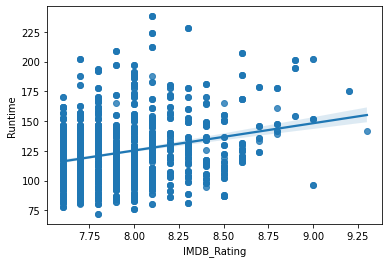

In [32]:
sns.regplot(x = 'IMDB_Rating', y = 'Runtime', data=data)

<AxesSubplot:xlabel='IMDB_Rating', ylabel='Meta_score'>

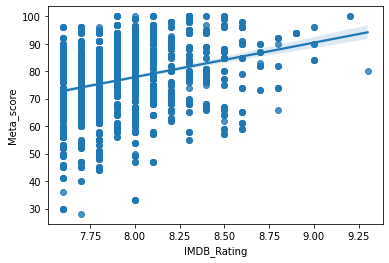

In [24]:
sns.regplot(x = 'IMDB_Rating', y = 'Meta_score', data=data)

<AxesSubplot:xlabel='IMDB_Rating', ylabel='No_of_Votes'>

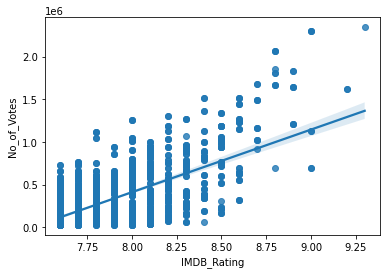

In [25]:
sns.regplot(x = 'IMDB_Rating', y = 'No_of_Votes', data=data)

<AxesSubplot:xlabel='IMDB_Rating', ylabel='Gross'>

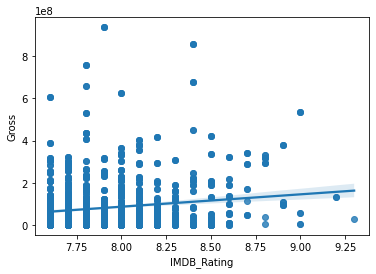

In [26]:
sns.regplot(x = 'IMDB_Rating', y = 'Gross', data=data)

<AxesSubplot:xlabel='Gross', ylabel='Runtime'>

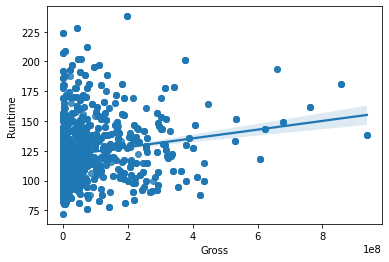

In [27]:
sns.regplot(x = 'Gross', y = 'Runtime', data=data)

<AxesSubplot:xlabel='Gross', ylabel='Meta_score'>

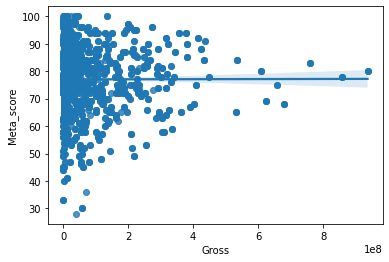

In [35]:
sns.regplot(x='Gross', y = 'Meta_score', data = data)

<AxesSubplot:xlabel='Gross', ylabel='No_of_Votes'>

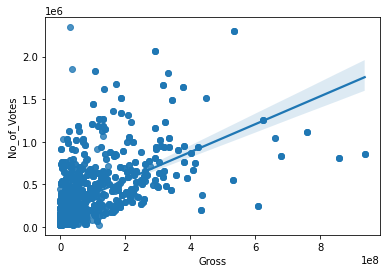

In [29]:
sns.regplot(x='Gross', y = 'No_of_Votes', data = data)

#Report

Insights:
- The higher Runtime, the higher IMDB Rating. A low growth.
- The higher Meta Score, the higher IMDB Rating. A low Growth.
- The higher Number of votes, the higher IMDB Rating. A Significant Growth.
- The higher Gross, the higher IMDB Rating. A low growth.
- The higher Gross, the higher Runtime. A low growth.
- The higher Gross, the higher Number of Votes. A Significant Growth.

Conclusion: NUmber of Votes really have significant impacts on IMDB Ratings and Movie's Gross.



